# Setup
####             Installation


In [79]:
#!pip install -q....
%pip install --upgrade pip
#!pip -V
%pip install forex-python

  Using cached pip-23.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Importation

In [152]:
# Data handling
import numpy as np
import pandas as pd
import re
from forex_python.converter import CurrencyRates
import datetime

# Vizualization (Matplotlib, plotly, seaborn, etc)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# EDA (pandas- profiling, etc)

# Feature processing (Scikit- learn processing, etc)

# Machine Learning( Scikit-learn Estimators, Catboost, LightGBM, etc)

# Hyperparameters Fine- Tuning (Scikit- learn, hp search, cross- validation, etc)

# other packages
#import os

# Data Loading

In [81]:
# loading the csv
df  = pd.read_csv('startup_funding2018.csv')
df1 = pd.read_csv('startup_funding2019.csv')
df2 = pd.read_csv('startup_funding2020.csv')
df3 = pd.read_csv('startup_funding2021.csv')


# Exploratory Data Analysis: EDA

#### Data Inspection

In [82]:
# view the loaded data ---- the function called can be changed based on the dataframe to be viewed.
df1.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [83]:
# determine the dataframe columns and datatypes
#df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [84]:
#df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [85]:
#df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [86]:
#df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


#### Hypotheses & Research Questions

Null Hypothesis: Ho: There is no relationship between amount sourced and       industry /sector
 Alternative Hypothesis: H1: There is a relationship between amount             sourced and industry/sector
 
 ```****
    1. Which Industry/sector receives the highest funding?
    2. Is there a relationship between the age of company and amount of funding sourced
    3. Which investors give the highest funding from investors?
    4. Which type of funding(series) is mostly accessed?
    5. Is location a factor in sourcing funding?
 ```****


#### Data cleaning 
###### df

In [87]:
#Matching the column names of df to df1,df2,df3 
# columns to change Company Name to Company/Brand,Industry to Sector,Round/Series to Stage,Location to HeadQuarter,About Company to What it does,adding $ to amount
df = df.rename(columns={
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location':'HeadQuarter',
    'About Company':'What it does',
    'Amount':'Amount($)'
})

df.head(5)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [88]:
# Rectifying inconsistent columns in df to match df1,df2,df3
# columns to add -- Founded, Founders & Investors
Added_columns = ['Founded', 'Founders', 'Investors']
for column in Added_columns:
    df[column] = None
    
# reindexing the columns and matching them with other datasets
df= df.reindex(columns=['Company/Brand','Founded','HeadQuarter','Sector','What it does','Founders','Investor','Amount($)','Stage'])
df.head(10)

# To check the new dataframe info. Uncomment the below code.
# df.info()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,None,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,250000,Seed
1,Happy Cow Dairy,None,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,None,NaN,"₹40,000,000",Seed
2,MyLoanCare,None,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,None,NaN,"₹65,000,000",Series A
3,PayMe India,None,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,None,NaN,2000000,Angel
4,Eunimart,None,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,None,NaN,—,Seed
5,Hasura,None,"Bengaluru, Karnataka, India","Cloud Infrastructure, PaaS, SaaS",Hasura is a platform that allows developers to...,None,NaN,1600000,Seed
6,Tripshelf,None,"Kalkaji, Delhi, India","Internet, Leisure, Marketplace",Tripshelf is an online market place for holida...,None,NaN,"₹16,000,000",Seed
7,Hyperdata.IO,None,"Hyderabad, Andhra Pradesh, India",Market Research,Hyperdata combines advanced machine learning w...,None,NaN,"₹50,000,000",Angel
8,Freightwalla,None,"Mumbai, Maharashtra, India","Information Services, Information Technology",Freightwalla is an international forwarder tha...,None,NaN,—,Seed
9,Microchip Payments,None,"Bangalore, Karnataka, India",Mobile Payments,Microchip payments is a mobile-based payment a...,None,NaN,—,Seed


In [89]:
#Truncate info in sector column to match the rest dataframes
df['Sector'] = df['Sector'].apply(lambda x: x.split(',')[0])
# the function splits the industry column in df and extracts the first element before comma
df.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,None,"Bangalore, Karnataka, India",Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,250000,Seed
1,Happy Cow Dairy,None,"Mumbai, Maharashtra, India",Agriculture,A startup which aggregates milk from dairy far...,None,NaN,"₹40,000,000",Seed
2,MyLoanCare,None,"Gurgaon, Haryana, India",Credit,Leading Online Loans Marketplace in India,None,NaN,"₹65,000,000",Series A
3,PayMe India,None,"Noida, Uttar Pradesh, India",Financial Services,PayMe India is an innovative FinTech organizat...,None,NaN,2000000,Angel
4,Eunimart,None,"Hyderabad, Andhra Pradesh, India",E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,None,NaN,—,Seed


In [90]:
# Extract capital city from Sector data df to match the df1,df2,df3
# the data in df headquater is arranged as capital city, state and country
#other datasets is capital city
df['HeadQuarter'] = df['HeadQuarter'].apply(lambda x: x.split(',')[0])
df.head (5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,None,Bangalore,Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,250000,Seed
1,Happy Cow Dairy,None,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,None,NaN,"₹40,000,000",Seed
2,MyLoanCare,None,Gurgaon,Credit,Leading Online Loans Marketplace in India,None,NaN,"₹65,000,000",Series A
3,PayMe India,None,Noida,Financial Services,PayMe India is an innovative FinTech organizat...,None,NaN,2000000,Angel
4,Eunimart,None,Hyderabad,E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,None,NaN,—,Seed


In [91]:
# Defining a function to remove currency symbols and commas
# currency conversion and changing amount column to float
c = CurrencyRates()

def remove_symbols_and_commas(x):
    if x is None or x.strip() == '':
        return x
    # This will check the type of the input value before applying the function and return the value as is if it's not a string, avoiding the TypeError.
    if x.startswith('$'):
        x = x.replace('$','').replace(',','').strip()
        x = float(x)
    elif x.startswith('₹'):
        x = x.replace('₹','').replace(',','').strip()
        x = float(x)
        x = c.convert('INR','USD', x)
    return x
    
# Apply the function to the amount column
df['Amount($)'] = df['Amount($)'].apply(remove_symbols_and_commas)
df.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,TheCollegeFever,None,Bangalore,Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,250000,Seed
1,Happy Cow Dairy,None,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,None,NaN,489035.530716,Seed
2,MyLoanCare,None,Gurgaon,Credit,Leading Online Loans Marketplace in India,None,NaN,794682.737414,Series A
3,PayMe India,None,Noida,Financial Services,PayMe India is an innovative FinTech organizat...,None,NaN,2000000,Angel
4,Eunimart,None,Hyderabad,E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,None,NaN,—,Seed


In [92]:
# check the data type and no. of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  526 non-null    object 
 1   Founded        0 non-null      object 
 2   HeadQuarter    526 non-null    object 
 3   Sector         526 non-null    object 
 4   What it does   526 non-null    object 
 5   Founders       0 non-null      object 
 6   Investor       0 non-null      float64
 7   Amount($)      526 non-null    object 
 8   Stage          526 non-null    object 
dtypes: float64(1), object(8)
memory usage: 37.1+ KB


In [93]:
# check irregularities in columns data ----Switch to different columns to note the difference
incorrect_dt = df1.groupby('Sector')
unique_count = incorrect_dt['Sector'].nunique()
unique_count

Sector
AI                              1
AI & Tech                       1
Accomodation                    1
AgriTech                        1
Automobile                      1
Automobile & Technology         1
Automotive tech                 1
B2B                             1
B2B Supply Chain                1
Banking                         1
Cosmetics                       1
Cybersecurity                   1
E-Sports                        1
E-commerce                      1
E-commerce & AR                 1
E-marketplace                   1
Ecommerce                       1
Edtech                          1
Fintech                         1
Food                            1
Food & Nutrition                1
Food & tech                     1
Food tech                       1
Foodtech                        1
Games                           1
HR tech                         1
Health                          1
Healthcare                      1
Healthtech                      1
Hospita

###### df1

In [94]:
# applying float conversion function in Amount column df1
# Apply the function to the amount column
df1['Amount($)'] = df1['Amount($)'].apply(remove_symbols_and_commas)
df1.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN


###### df2

In [95]:
# Rename Amount column to Amount($)
df2 = df2.rename(columns={
    'Amount': 'Amount($)'})
df2.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [97]:
# check irregularities in columns data ----Switch to different columns to note the difference
print(df2['Amount($)'].unique())

['$200,000' '$100,000' 'Undisclosed' '$400,000' '$340,000' '$600,000'
 '$45,000,000' '$1,000,000' '$2,000,000' '$1,200,000' '$660,000,000'
 '$120,000' '$7,500,000' '$5,000,000' '$500,000' '$3,000,000'
 '$10,000,000' '$145,000,000' '$100,000,000' nan '$21,000,000'
 '$4,000,000' '$20,000,000' '$560,000' '$275,000' '$4,500,000'
 '$15,000,000' '$390,000,000' '$7,000,000' '$5,100,000' '$700,000,000'
 '$2,300,000' '$700,000' '$19,000,000' '$9,000,000' '$40,000,000'
 '$750,000' '$1,500,000' '$7,800,000' '$50,000,000' '$80,000,000'
 '$30,000,000' '$1,700,000' '$2,500,000' '$40,000' '$33,000,000'
 '$35,000,000' '$300,000' '$25,000,000' '$3,500,000' '$200,000,000'
 '$6,000,000' '$1,300,000' '$4,100,000' '$575,000' '$800,000'
 '$28,000,000' '$18,000,000' '$3,200,000' '$900,000' '$250,000'
 '$4,700,000' '$75,000,000' '$8,000,000' '$121,000,000' '$55,000,000'
 '$3,300,000' '$11,000,000' '$16,000,000' '$5,400,000' '$150,000,000'
 '$4,200,000' '$22,000,000' '$52,000,000' '$1,100,000' '$118,000,000'
 

In [98]:
# Search and Return rows with irregularities for inspection
df2.loc[df2['Amount($)'] == '$887,000, $23,000,000']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
465,True Balance,2014,Gurugram,Finance,Earn money by meeting financial needs of your ...,"Charlie, Jay, Martin",Balancehero,"$887,000, $23,000,000",Series C,NaN


In [99]:
# check the sum of null value in the column
df2['Amount($)'].isna().sum()

#dropping the string characters
df2.replace(['Undisclosed','Undislosed','Undiclsosed',], np.nan, inplace= True)
df2.dropna(subset=['Amount($)'], inplace = True)
df2.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN


In [100]:
# Replace the range values with the average
df2['Amount($)']=df2['Amount($)'].replace('$887,000, $23,000,000','11943500').replace('$800,000,000 to $850,000,000','1650000000')

In [101]:
# Modifying remove_symbols_and_commas(x) function

c = CurrencyRates()

def remove_symbol1_and_commas(x):
    if x is None or x.strip() == '':
        return x
    # This will check the type of the input value before applying the function and return the value as is if it's not a string, avoiding the TypeError.
    if x.startswith('$'):
        x = x.replace('$','').replace(',','').strip().replace('.','').strip()
        x = float(x)
    return x
    
#astype str- ensures every values is converted to string to avoid errors
# # Apply the function to the amount column
df2['Amount($)'] = df2['Amount($)'].astype(str).apply(remove_symbol1_and_commas)

df2.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,NaN
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,NaN


In [102]:
# Remove column unnamed:9 to match other dataframes
df2= df2.drop(columns = 'Unnamed: 9')
df2.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed


###### df3

In [103]:
# Shifting the Amount values from investors and Stage categories from amount column
# creating a boolean mask to select the rows that need to be shifted
# Shift first $22,000,000 to Amount($)

# Shift the values in the Investor column to the Amount($) column
df3['Amount($)'] = df3.apply(lambda x: x['Investor'] if x['Investor'] in ['$22,000,000','$22,000,000','$5,000,000', '2000000', '$1,000,000','$Undisclosed'] else x['Amount($)'], axis=1)

# Shift the values in the Amount($) column to the Stage column
df3['Stage'] = df3.apply(lambda x: x['Amount($)'] if x['Amount($)'] in ['Series C','Seed','Pre-series A','Pre-series A'] else x['Stage'], axis=1)

# Shifting the values in Stage column to amount column
df3['Amount($)'] = df3.apply(lambda x: x['Stage'] if x['Stage'] in ['$1200000','$1200000','$300000','$300000', '$6000000','$1000000'] else x['Amount($)'], axis=1)
print(df3['Stage'].unique())


['Pre-series A' nan 'Series D' 'Series C' 'Seed' 'Series B' 'Series E'
 'Pre-seed' 'Series A' 'Pre-series B' 'Debt' '$1200000' 'Bridge' 'Seed+'
 'Series F2' 'Series A+' 'Series G' 'Series F' 'Series H' 'Series B3' 'PE'
 'Series F1' 'Pre-series A1' '$300000' 'Early seed' 'Series D1' '$6000000'
 '$1000000' 'Seies A' 'Pre-series' 'Series A2' 'Series I']


In [104]:
# move misplaced values into their respective columns
df3.loc[df3['Amount($)'] == 'Upsparks' ]
df3.loc[df3['Company/Brand']=='FanPlay', ['Amount($)', 'Stage']] = ['$1200000', 'Upsparks']
df3.drop([98], axis=0, inplace=True)
df3.loc[df3['Company/Brand']=='FanPlay']




,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,Upsparks


In [105]:
df3.loc[df3['Amount($)']=='ah! Ventures']
df3.loc[df3['Company/Brand']=='Little Leap', ['Amount($)', 'Stage', 'Investor']]==['$300000', np.nan, 'ah! Ventures']
df3.loc[df3['Investor']=='ah! Ventures']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
356,OwO,2020.0,Gurugram,E-commerce,"Shop packaged drinking water, beverages from y...",Hardev Sahu,ah! Ventures,"$200,000",NaN
840,Klassroom,2016.0,Mumbai,EdTech,Klassroom offers a one-of-a-kind LIVE interact...,Alka Javeri,ah! Ventures,"$200,000",Pre-series A
1133,Enercomp,2013.0,Ahmedabad,Information Technology & Services,Enercomp Solutions Pvt Ltd provide drone based...,SURESH SHAHDADPURI,ah! Ventures,$200000,NaN


In [106]:
df3.loc[df3['Amount($)']=='Pre-series A']
df3.loc[df3['Company/Brand']=='AdmitKard',['Amount($)', 'Stage', 'Investor']]=['$1000000', 'Pre-series A',np.nan]
df3.loc[df3['Company/Brand']=='AdmitKard']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


In [107]:
df3.loc[df3['Amount($)']=='ITO Angel Network LetsVenture']


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


In [109]:
df3.loc[df3['Company/Brand']=='BHyve', ['Amount($)', 'Stage']]=['$300000',np.nan ]
df3.loc[df3['Company/Brand']=='BHyve']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,NaN


In [110]:
df3.loc[df3['Amount($)']=='JITO Angel Network LetsVenture']
df3.loc[df3['Company/Brand']=='Saarthi Pedagogy', ['Amount($)', 'Stage']]=['$1000000',np.nan]
df3.loc[df3['Company/Brand']=='Saarthi Pedagogy']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,NaN


In [111]:
# df3.loc[df3['Amount($)']=='Seed']

#Shift (df3.loc[df3['Company/Brand']=='Godamwale') values to the right cells.
df3.loc[df3['Company/Brand']=='MoEVing', ['HeadQuarter','Sector','What it does','Founders','Investor','Amount($)','Stage']]=['Gurugram','Logistics',
'MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.','Vikash Mishra, Mragank Jain','Anshuman Maheshwary, Dr Srihari Raju Kalidindi',
'5000000', 'Seed']

#test if done correctly
df3.loc[df3['Company/Brand']=='MoEVing']


#rearrange values in (df3.loc[df3['Company/Brand']=='Godamwale') row
df3.loc[df3['Company/Brand']=='Godamwale', ['Amount($)', 'Stage', 'Investor']]=[1000000, 'Seed', np.nan]

#test if correct
df3.loc[df3['Company/Brand']=='Godamwale']

# cleaning Sochcast row
df3.loc[df3['Company/Brand']=='Sochcast', ['HeadQuarter','Sector','What it does','Founders','Investor','Amount($)','Stage']]=[np.nan,'Online Media',
'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','Vinners, Raj Nayak, Amritaanshu Agrawal',np.nan, np.nan, np.nan]

#check if okay
df3.loc[df3['Company/Brand']=='Sochcast']



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,NaN,Online Media,Sochcast is an Audio experiences company that ...,"Vinners, Raj Nayak, Amritaanshu Agrawal",NaN,NaN,NaN


In [112]:
#cleaning the sector colum for the selected row.
df3.loc[df3['Amount($)']=='Series C']
df3.loc[df3['Company/Brand']=='Fullife Healthcare', ['HeadQuarter','Sector','What it does','Founders','Investor','Amount($)','Stage']]=[np.nan,'Pharmaceuticals',
'Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.','Varun Khanna','Morgan Stanley Private Equity Asia','$22000000','Series C']
df3.loc[df3['Company/Brand']=='Fullife Healthcare']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C
256,Fullife Healthcare,2009.0,NaN,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C


In [113]:
df3['Amount($)'] = df3['Amount($)'].apply(str)
df3['Amount($)'].replace('',0, inplace=True, regex=True)
df3['Amount($)'] = df3['Amount($)'].apply(lambda x: str(x).replace('$',''))
df3['Amount($)'].replace(',','',inplace=True, regex=True)
df3['Amount($)'].replace('Undisclosed',np.nan, inplace=True, regex=True)
df3['Amount($)'].replace('undisclosed',np.nan, inplace=True, regex=True)
df3['Amount($)'].replace('Undisclsosed',np.nan, inplace=True, regex=True)
df3['Amount($)'].replace('Undislosed',np.nan, inplace=True, regex=True)
df3['Amount($)'].replace('nan',np.nan, inplace=True, regex=True)
df3['Amount($)']=df3['Amount($)'].replace('',np.nan).astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1208 non-null   object 
 1   Founded        1207 non-null   float64
 2   HeadQuarter    1204 non-null   object 
 3   Sector         1208 non-null   object 
 4   What it does   1208 non-null   object 
 5   Founders       1204 non-null   object 
 6   Investor       1143 non-null   object 
 7   Amount($)      1066 non-null   float64
 8   Stage          783 non-null    object 
dtypes: float64(2), object(7)
memory usage: 94.4+ KB


In [114]:
# create  year columns in all dataframes
df['Year']=2018
df1['Year']=2019
df2['Year']=2020
df3['Year']=2021

In [115]:
# Appending all the dataframes
Ind_funddf = pd.concat([df,df1,df2,df3], ignore_index=True)
Ind_funddf.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,TheCollegeFever,None,Bangalore,Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,250000,Seed,2018
1,Happy Cow Dairy,None,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,None,NaN,489035.530716,Seed,2018
2,MyLoanCare,None,Gurgaon,Credit,Leading Online Loans Marketplace in India,None,NaN,794682.737414,Series A,2018
3,PayMe India,None,Noida,Financial Services,PayMe India is an innovative FinTech organizat...,None,NaN,2000000,Angel,2018
4,Eunimart,None,Hyderabad,E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,None,NaN,—,Seed,2018


In [116]:
# check the data columns and datatypes
Ind_funddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2630 non-null   object
 1   Founded        1929 non-null   object
 2   HeadQuarter    2530 non-null   object
 3   Sector         2614 non-null   object
 4   What it does   2630 non-null   object
 5   Founders       2090 non-null   object
 6   Investor       2005 non-null   object
 7   Amount($)      2488 non-null   object
 8   Stage          1833 non-null   object
 9   Year           2630 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 205.6+ KB


In [117]:
# Further column checks
#display the data
Ind_funddf['Company/Brand']


0       TheCollegeFever
1       Happy Cow Dairy
2            MyLoanCare
3           PayMe India
4              Eunimart
             ...       
2625           Gigforce
2626             Vahdam
2627       Leap Finance
2628       CollegeDekho
2629             WeRize
Name: Company/Brand, Length: 2630, dtype: object

In [121]:
# change amount column into float
# Ind_funddf['Amount($)'] = Ind_funddf['Amount($)'].astype(str).apply(remove_symbol1_and_commas)
# Ind_funddf.info()

Ind_funddf['Amount($)'] = pd.to_numeric(Ind_funddf['Amount($)'], errors='coerce').astype(float)
Ind_funddf


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,TheCollegeFever,None,Bangalore,Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,2.500000e+05,Seed,2018
1,Happy Cow Dairy,None,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,None,NaN,4.890355e+05,Seed,2018
2,MyLoanCare,None,Gurgaon,Credit,Leading Online Loans Marketplace in India,None,NaN,7.946827e+05,Series A,2018
3,PayMe India,None,Noida,Financial Services,PayMe India is an innovative FinTech organizat...,None,NaN,2.000000e+06,Angel,2018
4,Eunimart,None,Hyderabad,E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,None,NaN,NaN,Seed,2018
...,...,...,...,...,...,...,...,...,...,...
2625,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3.000000e+06,Pre-series A,2021
2626,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,2.000000e+07,Series D,2021
2627,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,5.500000e+07,Series C,2021
2628,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",2.600000e+07,Series B,2021


In [122]:
#ifurther inspection on Stage column
Ind_funddf['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Debt', 'Pre-series C', 'Bridge', 'Series B2',
       'Pre-series B', 'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Round & Series A', 'Pre Series A',
       'Pre series A1', 'Series E2', 'Seed Round', 'Pre series B',
       'Pre series C', 'Angel Round', 'Series D1', 'Mid series',
       'Pre seed round', 'Series C, D',

In [162]:
# Further cleaning- Remove the link and the amount
Ind_funddf['Stage'] = Ind_funddf['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593','np.nan')
Ind_funddf['Stage'] = Ind_funddf['Stage'].replace('$6000000','np.nan')
Ind_funddf['Stage'] = Ind_funddf['Stage'].replace('$1000000','np.nan')
Ind_funddf['Stage'] = Ind_funddf['Stage'].replace('$300000','np.nan')
Ind_funddf['Stage'] = Ind_funddf['Stage'].replace('$1200000','Upsparks')
Ind_funddf['Stage'].unique()# Checking the updated Stage elements

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'np.nan', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round', nan, 'Fresh funding', 'Pre series A', 'Series G',
       'Post series A', 'Seed funding', 'Seed fund', 'Series F',
       'Series B+', 'Seed round', 'Pre-series A', 'Pre-seed', 'Debt',
       'Pre-series C', 'Bridge', 'Series B2', 'Pre-series B',
       'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A', 'Series A-1',
       'Seed Round & Series A', 'Pre Series A', 'Pre series A1',
       'Series E2', 'Seed Round', 'Pre series B', 'Pre series C',
       'Angel Round', 'Series D1', 'Mid series', 'Pre seed round',
       'Series C, D', 'Seed Funding', 'Upsparks', 'Seed+', 'Series F2',
       'Series A+', 'Series B3', 'PE', 'Series F1', '

In [176]:
# Cleaning the misspelt headquarter names to the right ones (HeadQuarter column)
Ind_funddf['HeadQuarter'] = Ind_funddf['HeadQuarter'].replace('Ahmadabad','Ahmedabad')
Ind_funddf['HeadQuarter'] = Ind_funddf['HeadQuarter'].replace('Uttar pradesh','Uttar Pradesh')



In [124]:
# Cleaning the sector column--- Change Fintech to FinTech
Ind_funddf['Sector'] = Ind_funddf['Sector'].replace('Fintech','FinTech')

In [125]:
# Return the first word before & in sector column
Ind_funddf['Sector'] =Ind_funddf['Sector'].str.split('&').str[0]
Ind_funddf['Sector'] 

0            Brand Marketing
1                Agriculture
2                     Credit
3         Financial Services
4       E-Commerce Platforms
                ...         
2625               Staffing 
2626                   Food 
2627      Financial Services
2628                  EdTech
2629      Financial Services
Name: Sector, Length: 2630, dtype: object

In [126]:
# checking the missing values
Ind_funddf.isnull().sum()

Company/Brand      0
Founded          701
HeadQuarter      100
Sector            16
What it does       0
Founders         540
Investor         625
Amount($)        305
Stage            797
Year               0
dtype: int64

In [127]:
# replace null values in amount column with 0
Ind_funddf['Amount($)'] = Ind_funddf['Amount($)'].replace(np.nan, 0, regex=True)

In [128]:
#re-clean sector column
Ind_funddf['Sector']= Ind_funddf['Sector'].astype(str)
Ind_funddf['Sector'] = Ind_funddf['Sector'].apply(lambda x: x.split(',')[0])


In [129]:
# dropping duplicated values
#checking the sum
Ind_funddf.duplicated().sum()

# dropping the duplicates
Ind_funddf.drop_duplicates(inplace=True)

# rechecking their presence
Ind_funddf.duplicated().sum()

0

# Univariate Analysis

In [130]:
# Numerical data summary.
Ind_funddf.describe()

,Amount($),Year
count,2.609000e+03,2609.000000
mean,1.077432e+08,2020.019548
std,3.241350e+09,1.138089
min,0.000000e+00,2018.000000
25%,4.500000e+05,2020.000000
50%,2.000000e+06,2020.000000
75%,1.000000e+07,2021.000000
max,1.500000e+11,2021.000000


In [131]:
# using distribution plots to understand individual variables
# Frequency distribution of the Industry/Sector
Ind_funddf['Sector'].value_counts()

FinTech                             238
EdTech                              139
Financial Services                   86
E-commerce                           69
Edtech                               56
                                   ... 
Personal care startup                 1
Car Service                           1
Online credit management startup      1
Battery design                        1
Staffing                              1
Name: Sector, Length: 537, dtype: int64

In [135]:
# Check Frequency distribution of Stage ---answers the question which is mostly accessed series
Ind_funddf['Stage'].value_counts()

Seed                     581
Series A                 299
Pre-series A             193
Series B                 133
Series C                 113
                        ... 
Series B+                  1
Non-equity Assistance      1
Seed fund                  1
Post series A              1
Series I                   1
Name: Stage, Length: 69, dtype: int64

In [179]:
# Check Frequency distribution of locations
Ind_funddf['HeadQuarter'].value_counts()

Bangalore                                             787
Mumbai                                                432
Gurugram                                              226
New Delhi                                             219
Chennai                                               101
                                                     ... 
Sydney, New South Wales, Australia                      1
Bangaldesh                                              1
San Francisco Bay Area, Silicon Valley, West Coast      1
Sydney                                                  1
Gandhinagar                                             1
Name: HeadQuarter, Length: 129, dtype: int64

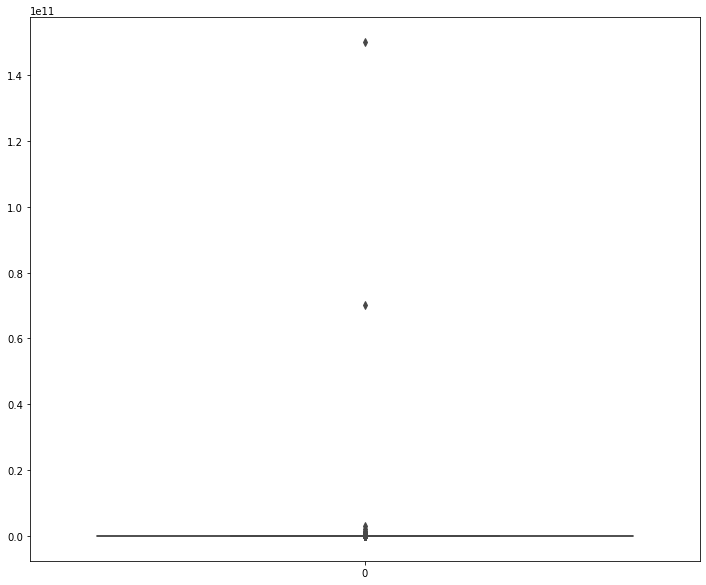

In [137]:
# Outlier detection
plt.figure(figsize=(12,10))
sns.boxplot(data=Ind_funddf['Amount($)'],whis = 0.5, palette='magma')
plt.show()

In [138]:
#viewing the outliers
desc = Ind_funddf['Amount($)'].describe()
upper_bound = desc['75%'] + 1.5*(desc['75%']-desc['25%'])
lower_bound = desc['25%'] - 1.5*(desc['75%']-desc['25%'])

outliers = Ind_funddf[(Ind_funddf['Amount($)'] > upper_bound) | (Ind_funddf['Amount($)'] < lower_bound)]
outliers.head(10)


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
90,SBI Life,None,Mumbai,Insurance,SBI Life is one of the life insurance company ...,None,NaN,7.420000e+08,Private Equity,2018
92,Design Cafe,None,Bengaluru,Home Decor,Design + Execution Organization that delivers ...,None,NaN,2.445178e+07,Series B,2018
94,Rays Power Infra,None,Jaipur,Energy,Rays Power Infra is a leading integrated Solar...,None,NaN,2.445178e+07,Venture - Series Unknown,2018
100,Aavas Financiers,None,Jaipur,Finance,Aavas Financiers is engaged in the business of...,None,NaN,2.445178e+07,Post-IPO Debt,2018
101,Swiggy,None,Bangalore,Food Delivery,Swiggy is a food ordering and delivery company...,None,NaN,1.000000e+09,Series H,2018
104,Toppr,None,Mumbai,EdTech,Toppr.com is an online preparation platform fo...,None,NaN,3.500000e+07,Series C,2018
106,Vivriti Capital,None,Chennai,Financial Services,Vivriti Capital is an online platform for inst...,None,NaN,2.850000e+07,Venture - Series Unknown,2018
115,Satin Creditcare Network Limited (SCNL),None,New Delhi,Banking,Satin is a non-banking finance company providi...,None,NaN,3.000000e+07,Post-IPO Debt,2018
116,APAC Financial Services,None,Mumbai,Finance,APAC Financial Services is a financial service...,None,NaN,3.056472e+07,Private Equity,2018
127,Ninjacart,None,Bengaluru,AgTech,Ninjacart is a B2B agri-marketing platform tha...,None,NaN,3.056472e+07,Series B,2018


# Multivariate Analysis

In [141]:
# Which industry/Sector receives the highest funding?
#group by sector counts
sect_grpng =Ind_funddf.groupby('Sector').sum()
sect_grpng

# group by sector count and amount
hghst_fndd_sect = sect_grpng['Amount($)'].sort_values(ascending=False)
#.idxmax()
hghst_fndd_sect 


Sector
FinTech            1.547826e+11
Retail             7.054238e+10
EdTech             3.728190e+09
Tech company       3.022700e+09
E-commerce         2.879052e+09
                       ...     
Defense            0.000000e+00
NFT Marketplace    0.000000e+00
Safety tech        0.000000e+00
D2C startup        0.000000e+00
3D Printing        0.000000e+00
Name: Amount($), Length: 537, dtype: float64

In [156]:
#
# create a function for calculating the age of the company
def calculate_age(founded):
    current_year = datetime.datetime.now().year
    if founded:
        try:
            founded = int(founded)
            return current_year - founded
        except ValueError:
            return None
    else:
        return None

# apply the function in the dataframe
Ind_funddf['Age'] = Ind_funddf['Founded'].apply(calculate_age)
Ind_funddf

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Age
0,TheCollegeFever,NaN,Bangalore,Brand Marketing,"TheCollegeFever is a hub for fun, fiesta and f...",None,NaN,2.500000e+05,Seed,2018,NaN
1,Happy Cow Dairy,NaN,Mumbai,Agriculture,A startup which aggregates milk from dairy far...,None,NaN,4.890355e+05,Seed,2018,NaN
2,MyLoanCare,NaN,Gurgaon,Credit,Leading Online Loans Marketplace in India,None,NaN,7.946827e+05,Series A,2018,NaN
3,PayMe India,NaN,Noida,Financial Services,PayMe India is an innovative FinTech organizat...,None,NaN,2.000000e+06,Angel,2018,NaN
4,Eunimart,NaN,Hyderabad,E-Commerce Platforms,Eunimart is a one stop solution for merchants ...,None,NaN,0.000000e+00,Seed,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2625,Gigforce,2019.0,Gurugram,Staffing,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3.000000e+06,Pre-series A,2021,4.0
2626,Vahdam,2015.0,New Delhi,Food,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,2.000000e+07,Series D,2021,8.0
2627,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,5.500000e+07,Series C,2021,4.0
2628,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",2.600000e+07,Series B,2021,8.0


0.020162104404405825


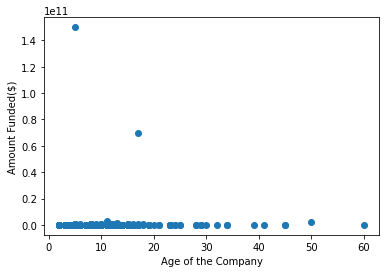

In [157]:
#Is there a relationship between the age of company and amount of funding sourced?
# Calculating the correlation between Age and Amount Founded
correlation = Ind_funddf['Age'].corr(Ind_funddf['Amount($)'])
print(correlation)


# Plotting the scatter chart to visualize the same
plt.scatter(Ind_funddf['Age'], Ind_funddf['Amount($)'])

# Labeling the x and y axis
plt.xlabel('Age of the Company')
plt.ylabel('Amount Funded($)')

# Displaying the chart
plt.show()

In [167]:
# Which investors gives the highest funding ?
#grouping by investors
invstrs_grpng =Ind_funddf.groupby('Investor').sum(1)
invstrs_grpng 

 # Aggregating investors groups by Amount funded 
hghst_fndd_invstrs = invstrs_grpng['Amount($)'].sort_values(ascending=False)
#.idxmax()
hghst_fndd_invstrs



Investor
Silver Lake, Mubadala Investment Company                7.000000e+10
Salesforce Ventures, Dragoneer Investment Group         3.000000e+09
Facebook, Google, KKR, Silver Lake                      2.200000e+09
Bertelsmann India Investments, Sequoia Capital India    1.650000e+09
Tiger Global                                            1.417000e+09
                                                            ...     
CESC Ventures                                           0.000000e+00
Sequoia Capital India, Matrix Partners India            0.000000e+00
Blume Ventures, Whiteboard Capital                      0.000000e+00
BlueOrchard Finance Limited                             0.000000e+00
James Milner, Adam Lallana                              0.000000e+00
Name: Amount($), Length: 1607, dtype: float64

In [165]:
# Which type of funding(stage) is mostly accessed and the best funded
# find count and agregation by amount
# Ind_funddf['Stage'] = Ind_funddf['Stage'].astype(str).sum()
# Ind_funddf['Stage']

#mostly accessed stage
stg_grpng = Ind_funddf.groupby('Stage').sum()
stg_grpng

#the most funded series
hghst_stg_grpng = stg_grpng['Amount($)'].sort_values(ascending=False)

hghst_stg_grpng

Stage
Debt                     1.505874e+11
Series C                 5.371307e+09
Series B                 3.722646e+09
Series D                 3.523184e+09
Series E                 3.418062e+09
                             ...     
Pre-Seed                 2.350000e+05
Non-equity Assistance    4.000000e+04
Undisclosed              1.589365e+04
Early seed               0.000000e+00
Series C, D              0.000000e+00
Name: Amount($), Length: 68, dtype: float64

In [178]:
# Is location a factor?
lctn_grpng = Ind_funddf.groupby('HeadQuarter').sum()
lctn_grpng

#aggreagating the location based on amount
lctn_amt_grpng = lctn_grpng ['Amount($)'].sort_values(ascending=False)
lctn_amt_grpng

HeadQuarter
Mumbai        2.322873e+11
Bangalore     2.383453e+10
Gurugram      5.565175e+09
New Delhi     3.385512e+09
California    3.078300e+09
                  ...     
Guwahati      0.000000e+00
Anand         0.000000e+00
Azadpur       0.000000e+00
Ernakulam     0.000000e+00
Worli         0.000000e+00
Name: Amount($), Length: 129, dtype: float64

##### Observations/ Conclusions
a. Financial technologyly sector had the highest frequency followed by Education technology sector.The industries entail incoporation of technology in financial services or educational service

        On sorting the amount founded based on the sector, financial technology industry had the highest funding amount followed by Retail and EdTech was the third in rank.

b. Based on stage of the companies. The following were the results for top 5.Seed stage had the highest Frequency, indicating that most companies were in seed stage.
     Stage                   Frequency
     Seed                     581
     Series A                 299
     Pre-series A             193
     Series B                 133
     Series C                 113
   
   However when the stage was categorized based on the amount funded in a specific stage. The following were the results for top 5.
       Stage                     Amount Funded
       Debt                     1.505874e+11
       Series C                 5.371307e+09
       Series B                 3.722646e+09
       Series D                 3.523184e+09
       Series E                 3.418062e+09
    
    It is observed that most investors preffered funding the companies at later stages. Companies at Debt stage were the highly funded by the investors.

c. Bangalore had the highest Frequency. Indicating that most companies were based there. The following were top 5 results for count. 
     HeadQuarter                                     Frequency
     Bangalore                                        787
     Mumbai                                           432
     Gurugram                                         226
     New Delhi                                        219
     Chennai                                          101

On categorizing location of the company based on the amount Mumbai was the highest in amount funded. The following are top 5 results
    HeadQuarter    Amount
     Mumbai        2.322873e+11
     Bangalore     2.383453e+10
     Gurugram      5.565175e+09
     New Delhi     3.385512e+09
     California    3.078300e+09  


d. The outer most outlier sectors based on amount were Insurance sector and ata private equity stage. 

e. The correlation between age of the company and amount is 0.020162104404405825
     This is a weak positive correlation between age of the company and the amount funded.
     Indicating that as the age of the company increases there is likely the amount increases as well. The correlation is not strong indicating that other factors may affect funding.
     Kindly note that the column contains null values in 2018 dataset.

f. Among the best investors with the highest amount funded are, investment companies,Facebook, Google, KKR and  Silver Lake 